In [1]:
import numpy as np
import os
import scipy.io as sio
import gc

In [5]:
matFile=[]
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/1_20131030.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/1_20131027.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/1_20131107.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/2_20140404.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/2_20140413.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/2_20140419.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/3_20140603.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/3_20140611.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/3_20140629.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/4_20140621.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/4_20140702.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/4_20140705.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/5_20140411.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/5_20140418.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/5_20140506.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/6_20130712.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/6_20131016.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/6_20131113.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/7_20131027.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/7_20131030.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/7_20131106.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/8_20140511.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/8_20140514.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/8_20140521.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/9_20140620.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/9_20140627.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/9_20140704.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/10_20131130.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/10_20131204.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/10_20131211.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/11_20140618.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/11_20140625.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/11_20140630.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/12_20131127.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/12_20131201.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/12_20131207.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/13_20140527.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/13_20140603.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/13_20140610.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/14_20140601.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/14_20140615.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/14_20140627.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/15_20130709.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/15_20131016.mat')
matFile.append(r'./Preprocessed_EEG/Preprocessed_EEG/15_20131105.mat')

In [6]:
count=0
SepMatFile = []
temp=[]
for i in matFile:
    temp.append(i)
    if(count % 3 == 2):
        SepMatFile.append(temp)
        temp = []
    count+=1

In [8]:
data = []
for i in SepMatFile:
    singleData = []
    for j in i:
        singleData.append(sio.loadmat(j))  # 读取该目录下的所有.mat文件
    data.append(singleData)

In [6]:
all_keys = []
all_eegLen = []
for i in range(15):
    # 获取每个.mat中eeg信号变量的键的列表与每次实验eeg信号的长度
    keys = []
    eegLen = []
    for j in data[i]:
        temKeys = []
        temLen = []
        flag = 0
        for k in j:
            temKeys.append(k)
            if(flag >= 3):  # 第三项以后才是eeg的数据
                temLen.append(j[k].shape[1])
            flag += 1
        temKeys = temKeys[3:]  # 获取每个字典第三项后所有的键
        keys.append(temKeys)
        eegLen.append(temLen)
    all_keys.append(keys)
    all_eegLen.append(eegLen)

In [8]:
length = 200 # 每组的长度
nbExperiment = 15

adjLen = [x - 1 for x in eegLen[0]]
# 在数据末尾补0，因为ndarray要求每一维的长度一定
Len = []
for i in eegLen:
    Len.append(max(i))
maxLeng = max(Len)  # 找到最大的实验长度，作为ndarray容器的长度
maxLen = (maxLeng // length + 1) * length

In [10]:
eeg = np.zeros([15, 3, 15, 62, maxLen])  # 容器的初始化
for m in range(15):
    for (singleKeys, singleLen, i) in zip(all_keys[m], all_eegLen[m], range(3)):  # 遍历.mat
        for (key, j) in zip(singleKeys, range(nbExperiment)):  # 遍历所有实验
            for k in range(62):  # 遍历通道
                tem = np.zeros([maxLen - adjLen[j]])  # 对每个序列都补0，变成最大长度
                eeg[m][i][j][k] = np.append(data[m][i][key][k][:-1], tem)

del data
gc.collect()

In [12]:
print(eeg.shape)
eeg = eeg.reshape(eeg.shape[0], eeg.shape[1],  eeg.shape[2], eeg.shape[3], -1, length)
eeg = eeg.swapaxes(-2, -3)
print(eeg.shape)

(15, 3, 15, 62, 53200)
(15, 3, 15, 266, 62, 200)


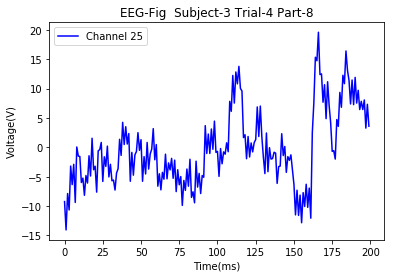

In [13]:
# 选择两个通道查看波形
import matplotlib
import matplotlib.pyplot as plt
import random

%matplotlib inline
ranSub = random.randint(0, 3)
ranTrial = random.randint(0, 15)
ranPart = random.randint(0, 10)
ranChannel = random.randint(0, 61)

Volts_Channel = eeg[2][ranSub][ranTrial][ranPart][ranChannel]
time = range(0, length)

plt.plot(time, Volts_Channel, 'b', label='Channel %d' % (ranChannel + 1))
plt.title('EEG-Fig  Subject-%d Trial-%d Part-%d' %
          (ranSub + 1, ranTrial + 1, ranPart + 1))
plt.xlabel('Time(ms)')
plt.ylabel('Voltage(V)')
plt.legend()
plt.show()

In [57]:
np.save('delete!' ,eeg_noZero)

In [1]:
eeg = np.load('delete!.npy')

In [17]:
def downSample(data, originLen, targetLen):
    '''
    input: 数据
    originLen: 原长度
    targetLen: 目标长度
    '''

    gap = originLen // (targetLen - 1)

    downSamp = np.zeros([data.shape[0], data.shape[1], data.shape[2], data.shape[3], data.shape[4], 
                         targetLen])
    for m in range(data.shape[0]):
        for n in range(data.shape[1]):
            for x in range(data.shape[2]):
                for i in range(data.shape[3]):  # sample
                    for j in range(data.shape[4]):  # channel
                        downSamp[m][n][x][i][j][0] = data[m][n][x][i][j][0]  # 0单独处理
                        for k in range(gap - 1, data.shape[-1], gap):  # 间隔采样
                            downSamp[m][n][x][i][j][k // gap] = data[m][n][x][i][j][k]
    return downSamp

In [18]:
eeg = downSample(eeg, originLen = eeg.shape[-1], targetLen = 25)

In [19]:
eeg.shape

(15, 3, 15, 266, 62, 25)

In [20]:
np.save('./trials/SEED_time_series_25_single_trail.npy',eeg)

In [3]:
eeg = np.load('temp.npy')
eeg.shape

(152730, 62, 50)

In [4]:
#inputShape = nSample * 62(channel) * 100(timeLen)
#MapShape = nSample * 100(freq) * (9*9)
nSample = eeg.shape[0]
timeRange = eeg.shape[2]
time_headMap = np.zeros([nSample, 9, 9, timeRange])

In [5]:
# 电极对应到二维矩阵中，可对应map.xlsx中的图看看
for i in range(nSample):  # 样本数循环
    # 0-1行
    time_headMap[i][0][3] = eeg[i][0]
    time_headMap[i][0][4] = eeg[i][1]
    time_headMap[i][0][5] = eeg[i][2]
    time_headMap[i][1][3] = eeg[i][3]
    time_headMap[i][1][5] = eeg[i][4]

    # 2-5行
    for m in range(2, 7):
        for k in range(9):
            time_headMap[i][m][k] = eeg[i][(m - 2) * 9 + k + 5]

    # 第7行
    for m in range(1, 8):
        time_headMap[i][7][m] = eeg[i][m + 49]

    # 第8行
    for m in range(2, 7):
        time_headMap[i][8][m] = eeg[i][m + 55]

In [6]:
time_headMap.shape

(152730, 9, 9, 50)

In [7]:
# 设置新的边长
sideLen = 32

In [8]:
timeFirst = time_headMap.swapaxes(2, 3).swapaxes(1, 2)

print(timeFirst.shape)

(152730, 50, 9, 9)


In [9]:
import gc
del time_headMap, eeg
gc.collect()

20

In [ ]:
from scipy import interpolate

timeMap = np.zeros([timeFirst.shape[0], timeFirst.shape[1],
                    sideLen, sideLen], dtype=np.float32)

for i in range(timeFirst.shape[0]):  # 样本数循环
    for j in range(timeFirst.shape[1]):  # 频率循环
        x = np.arange(9)
        y = np.arange(9)
        z = timeFirst[i][j]  # 取出每一个平面

        f = interpolate.interp2d(x, y, z, kind='cubic')  # cubic为三次
        xnew = np.linspace(0, 8, sideLen)
        ynew = np.linspace(0, 8, sideLen)
        timeMap[i][j] = f(xnew, ynew)

In [ ]:
import pylab as pl
import matplotlib as mpl

%matplotlib inline
pl.subplot(121)
im1 = pl.imshow(timeFirst[0][0], extent=[-1, 1, -1, 1],
                cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
pl.colorbar(im1)

pl.subplot(122)
im2 = pl.imshow(timeMap[0][0], extent=[-1, 1, -1, 1],
                cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
pl.colorbar(im1)
pl.show()

In [ ]:
# 标准化
#sample * time * 32 * 32
for i in range(timeMap.shape[0]):
    for j in range(timeMap.shape[1]):
        timeMap[i][j] = timeMap[i][j] - timeMap[i][j].mean()

for i in range(timeMap.shape[0]):
    for j in range(timeMap.shape[1]):
        timeMap[i][j] = timeMap[i][j] / timeMap[i][j].std()
        
# 换轴
timeMap = timeMap.swapaxes(1, 2).swapaxes(2, 3)

In [ ]:
raw_shape = list(timeMap.shape)
raw_shape.append(1)

timeMap = timeMap.reshape(raw_shape)

In [ ]:
# 导出
np.save('SEED_temporal_map', timeMap)